# PRCP-1001-RiceLeaf (Rice Leaf Disease using CNN)

# Team ID: PTID-CDS-JAN22-1274


# Abstract:

- Identification of diseases from the images of a plant is one of the interesting research areas in the agriculture field, for which machine learning concepts of computer field can be applied. This project presents a simple model for detection and classification of rice diseases based on the images of infected rice plants. This model is developed after detailed experimental analysis of  technique using CNN models for image processing operations. We consider three rice plant diseases namely Bacterial leaf blight, Brown spot and Leaf smut. 



# Introduction:

- Plant diseases are one of the causes in the reduction of quality and quantity of agriculture crops. Reduction in both aspects can directly affect the overall production of the crop in a country. The main problem is a lack of continuous monitoring of the plants. Sometimes newbie farmers are not aware of the diseases and its occurrence period. Generally, diseases can occur on any plant at any time. However, a continuous monitoring may prevent disease infection.The detection of a plant disease is one of the important research topics in the agriculture domain. In this project we attempt to apply concepts of Deep Learning to solve the problem of automatic detection and classification of diseases of the rice plant, which is one of the important foods in India. On any plant, diseases are caused by bacteria, fungi, and virus. For rice plants fewcommon diseases are Bacterial leaf blight, Brown spot, Leaf smut.



- Image processing operations can be applied on external appearances of infected plants. However, the symptoms of diseases are different for different plants. Some diseases may have brown color or some may have a yellow color. Each disease has its own unique characteristics. Diseases differ in shape, size, and color of disease symptoms. Some of the diseases might have the same color, but different shapes; while some have different colors but same shapes. Sometimes farmers get confused and are unable to take proper decision for selection of pesticides.Capturing the images of infected leaves and finding out the information about the disease is one way to get rid of loss of crop due to disease infection.As an automated solution of this problem, cameras can be deployed at certain distances in the farm to capture images periodically. These images can be sent to a central system for analysis of diseases; the system can detect the diseaseand give information about the disease and pesticide selection.



- At the core of such system would be to automatically recognize the disease that has occurred.



- We briefly present our approach to solving the problem of automatic detection and classification of rice plant diseases.


- 


###### **Dataset Contents**
. This dataset contains 120 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

#### **Classes**
- Leaf smut
- Brown spot
- Bacterial leaf blight

In [1]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense, Dropout 
#from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, CSVLogger
import os
import cv2

#### Overall approach for the project

In [2]:
#To generate multimple images for train and test data

DataGen = ImageDataGenerator(rotation_range = 40, width_shift_range = .2,
                                    height_shift_range = .2, shear_range = .2, 
                                    zoom_range = .2, horizontal_flip = True, fill_mode = 'nearest')

#### Now we have the collections of images as follows :-

* Training Data - 1200 images
* Test Data - 240 images

#### Getting the augmented train and test data from the image repository

In [3]:
path_train = r"C:\Users\ahmed\OneDrive\internship projects\RiceLeaf"


path_test = r"C:\Users\ahmed\OneDrive\internship projects\RiceLeaf"

In [4]:
# Showing augmented images

def plotImages(images_array):
    fig, axes = plt.subplots(1, 5, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip (images_array, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
# Let us try to create more images for our train dataset using the function as given below :

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [6]:
# Generate more images for training data :

# This generator will read pictures found in the training_data_path, and indefinitely generate batches of augmented image data


training_data = train_datagen.flow_from_directory(path_train, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      shuffle=True,
                                      class_mode='binary')

Found 119 images belonging to 5 classes.


In [7]:
training_data.class_indices

{'Bacterial leaf blight': 0,
 'Brown spot': 1,
 'Leaf smut': 2,
 'assets': 3,
 'variables': 4}

In [8]:
# This is the augmentation configuration we will use for validation / test data :

test_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [9]:
# This is a similar generator, for validation data / test data :

# This generator will read pictures found in the training_data_path, and indefinitely generate batches of augmented image data

test_data = test_datagen.flow_from_directory(path_test,
                                  target_size=(150,150),
                                  batch_size=32,
                                  shuffle=True,
                                  class_mode='binary')

Found 119 images belonging to 5 classes.


In [10]:
test_data.class_indices

{'Bacterial leaf blight': 0,
 'Brown spot': 1,
 'Leaf smut': 2,
 'assets': 3,
 'variables': 4}

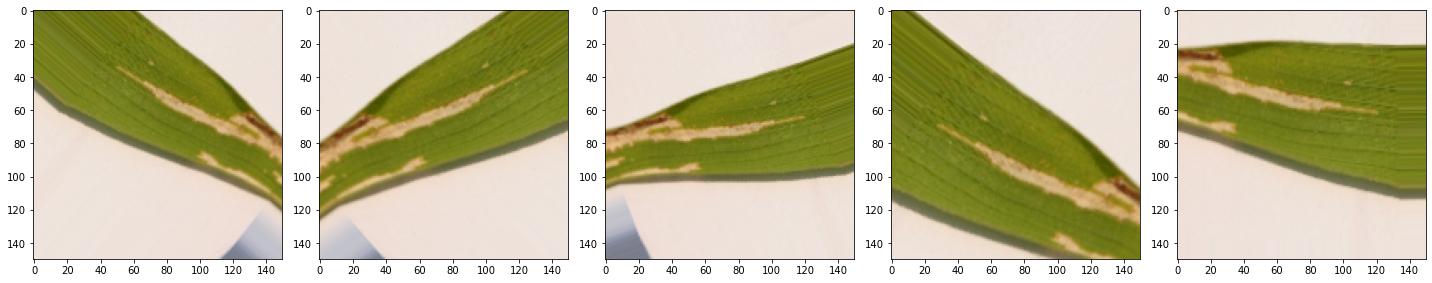

In [11]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

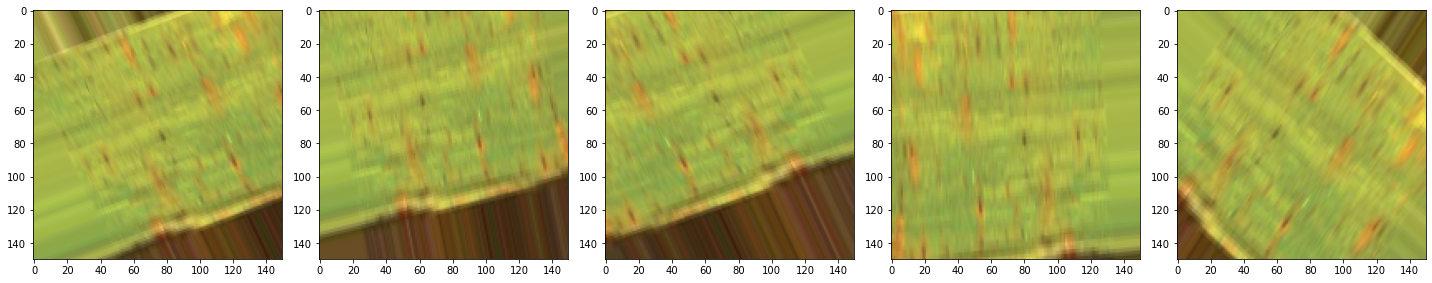

In [12]:
images = [test_data[0][0][0] for i in range(5)]
plotImages(images)

##### Let us create a path where our model will saved - with model path
##### Let us monitor the validation accuracy and save the model with best validation accuracy
##### Let us save the model in the csv format in order to generate graphs
##### We will do it with the help of callbacks

In [13]:
model_path = 'C:\\Users\\ahmed\\OneDrive\\internship projects\\RiceLeaf' # Hierarchial data format
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
log_csv = CSVLogger('my_logs.csv', separator = ',', append=False)
callbacks_list = [checkpoint, log_csv]

##### Let us build the CNN model

In [14]:
# Build the CNN model

model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size =(3,3) ,  activation ='relu' , input_shape = [150, 150, 3]  ))
model.add(MaxPool2D(pool_size =(2,2)))


model.add(Conv2D(filters = 32 , kernel_size =(3,3) , activation= 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())

model.add(Dense(128 , activation = 'relu' , input_shape = [150, 150, 3]))
model.add(Dropout(0.4))
model.add(Dense(3 , activation= 'softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

##### Let us train the CNN model using training data, test data, for 500 epochs and our callback list

In [15]:
# Train cnn model

history = model.fit(training_data, epochs=500, verbose=1, validation_data= test_data, callbacks=callbacks_list)

Epoch 1/500
4/4 [==============================] - ETA: 0s - loss: 1.4712 - accuracy: 0.2857
Epoch 00001: val_accuracy improved from -inf to 0.33613, saving model to C:\Users\ahmed\OneDrive\internship projects\RiceLeaf
INFO:tensorflow:Assets written to: C:\Users\ahmed\OneDrive\internship projects\RiceLeaf\assets
4/4 [==============================] - 13s 4s/step - loss: 1.4712 - accuracy: 0.2857 - val_loss: 1.1570 - val_accuracy: 0.3361
Epoch 2/500
4/4 [==============================] - ETA: 0s - loss: 1.0903 - accuracy: 0.3866
Epoch 00002: val_accuracy did not improve from 0.33613
4/4 [==============================] - 10s 3s/step - loss: 1.0903 - accuracy: 0.3866 - val_loss: 1.1464 - val_accuracy: 0.3193
Epoch 3/500
4/4 [==============================] - ETA: 0s - loss: 1.1945 - accuracy: 0.3697
Epoch 00003: val_accuracy improved from 0.33613 to 0.34454, saving model to C:\Users\ahmed\OneDrive\internship projects\RiceLeaf
INFO:tensorflow:Assets written to: C:\Users\ahmed\OneDrive\int

Epoch 26/500
4/4 [==============================] - ETA: 0s - loss: 0.9986 - accuracy: 0.5042
Epoch 00026: val_accuracy did not improve from 0.54622
4/4 [==============================] - 10s 3s/step - loss: 0.9986 - accuracy: 0.5042 - val_loss: 0.9901 - val_accuracy: 0.5210
Epoch 27/500
4/4 [==============================] - ETA: 0s - loss: 0.9978 - accuracy: 0.5042
Epoch 00027: val_accuracy did not improve from 0.54622
4/4 [==============================] - 12s 4s/step - loss: 0.9978 - accuracy: 0.5042 - val_loss: 0.9643 - val_accuracy: 0.5294
Epoch 28/500
4/4 [==============================] - ETA: 0s - loss: 1.0019 - accuracy: 0.4706
Epoch 00028: val_accuracy did not improve from 0.54622
4/4 [==============================] - 12s 4s/step - loss: 1.0019 - accuracy: 0.4706 - val_loss: 1.0050 - val_accuracy: 0.4790
Epoch 29/500
4/4 [==============================] - ETA: 0s - loss: 1.0141 - accuracy: 0.4454
Epoch 00029: val_accuracy did not improve from 0.54622
4/4 [==================

Epoch 53/500
4/4 [==============================] - ETA: 0s - loss: 0.9322 - accuracy: 0.5546
Epoch 00053: val_accuracy did not improve from 0.64706
4/4 [==============================] - 8s 2s/step - loss: 0.9322 - accuracy: 0.5546 - val_loss: 0.9148 - val_accuracy: 0.6387
Epoch 54/500
4/4 [==============================] - ETA: 0s - loss: 0.9816 - accuracy: 0.5042
Epoch 00054: val_accuracy did not improve from 0.64706
4/4 [==============================] - 8s 2s/step - loss: 0.9816 - accuracy: 0.5042 - val_loss: 0.9230 - val_accuracy: 0.5462
Epoch 55/500
4/4 [==============================] - ETA: 0s - loss: 0.9636 - accuracy: 0.5462
Epoch 00055: val_accuracy improved from 0.64706 to 0.65546, saving model to C:\Users\ahmed\OneDrive\internship projects\RiceLeaf
INFO:tensorflow:Assets written to: C:\Users\ahmed\OneDrive\internship projects\RiceLeaf\assets
4/4 [==============================] - 9s 3s/step - loss: 0.9636 - accuracy: 0.5462 - val_loss: 0.9127 - val_accuracy: 0.6555
Epoch 

INFO:tensorflow:Assets written to: C:\Users\ahmed\OneDrive\internship projects\RiceLeaf\assets
4/4 [==============================] - 20s 6s/step - loss: 0.7524 - accuracy: 0.7143 - val_loss: 0.7234 - val_accuracy: 0.7731
Epoch 110/500
4/4 [==============================] - ETA: 0s - loss: 0.7481 - accuracy: 0.7059
Epoch 00110: val_accuracy did not improve from 0.77311
4/4 [==============================] - 11s 3s/step - loss: 0.7481 - accuracy: 0.7059 - val_loss: 0.7067 - val_accuracy: 0.7647
Epoch 111/500
4/4 [==============================] - ETA: 0s - loss: 0.8004 - accuracy: 0.6723
Epoch 00111: val_accuracy did not improve from 0.77311
4/4 [==============================] - 10s 3s/step - loss: 0.8004 - accuracy: 0.6723 - val_loss: 0.7130 - val_accuracy: 0.7479
Epoch 112/500
4/4 [==============================] - ETA: 0s - loss: 0.8097 - accuracy: 0.5966
Epoch 00112: val_accuracy did not improve from 0.77311
4/4 [==============================] - 10s 3s/step - loss: 0.8097 - accura

4/4 [==============================] - ETA: 0s - loss: 0.6829 - accuracy: 0.6975
Epoch 00167: val_accuracy did not improve from 0.79832
4/4 [==============================] - 12s 4s/step - loss: 0.6829 - accuracy: 0.6975 - val_loss: 0.6434 - val_accuracy: 0.7311
Epoch 168/500
4/4 [==============================] - ETA: 0s - loss: 0.7288 - accuracy: 0.7059
Epoch 00168: val_accuracy did not improve from 0.79832
4/4 [==============================] - 12s 3s/step - loss: 0.7288 - accuracy: 0.7059 - val_loss: 0.6703 - val_accuracy: 0.6975
Epoch 169/500
4/4 [==============================] - ETA: 0s - loss: 0.6744 - accuracy: 0.7143
Epoch 00169: val_accuracy did not improve from 0.79832
4/4 [==============================] - 14s 4s/step - loss: 0.6744 - accuracy: 0.7143 - val_loss: 0.6365 - val_accuracy: 0.7983
Epoch 170/500
4/4 [==============================] - ETA: 0s - loss: 0.6781 - accuracy: 0.7311
Epoch 00170: val_accuracy did not improve from 0.79832
4/4 [============================

INFO:tensorflow:Assets written to: C:\Users\ahmed\OneDrive\internship projects\RiceLeaf\assets
4/4 [==============================] - 11s 3s/step - loss: 0.6856 - accuracy: 0.7227 - val_loss: 0.5802 - val_accuracy: 0.8151
Epoch 197/500
4/4 [==============================] - ETA: 0s - loss: 0.6273 - accuracy: 0.7395
Epoch 00197: val_accuracy did not improve from 0.81513
4/4 [==============================] - 8s 3s/step - loss: 0.6273 - accuracy: 0.7395 - val_loss: 0.5789 - val_accuracy: 0.8067
Epoch 198/500
4/4 [==============================] - ETA: 0s - loss: 0.6371 - accuracy: 0.7227
Epoch 00198: val_accuracy did not improve from 0.81513
4/4 [==============================] - 8s 2s/step - loss: 0.6371 - accuracy: 0.7227 - val_loss: 0.6035 - val_accuracy: 0.7899
Epoch 199/500
4/4 [==============================] - ETA: 0s - loss: 0.6748 - accuracy: 0.7143
Epoch 00199: val_accuracy did not improve from 0.81513
4/4 [==============================] - 9s 2s/step - loss: 0.6748 - accuracy:

4/4 [==============================] - ETA: 0s - loss: 0.5467 - accuracy: 0.8151
Epoch 00254: val_accuracy did not improve from 0.85714
4/4 [==============================] - 10s 3s/step - loss: 0.5467 - accuracy: 0.8151 - val_loss: 0.5155 - val_accuracy: 0.7983
Epoch 255/500
4/4 [==============================] - ETA: 0s - loss: 0.6029 - accuracy: 0.7395
Epoch 00255: val_accuracy did not improve from 0.85714
4/4 [==============================] - 9s 3s/step - loss: 0.6029 - accuracy: 0.7395 - val_loss: 0.5340 - val_accuracy: 0.8151
Epoch 256/500
4/4 [==============================] - ETA: 0s - loss: 0.6310 - accuracy: 0.7143
Epoch 00256: val_accuracy did not improve from 0.85714
4/4 [==============================] - 9s 3s/step - loss: 0.6310 - accuracy: 0.7143 - val_loss: 0.4926 - val_accuracy: 0.8319
Epoch 257/500
4/4 [==============================] - ETA: 0s - loss: 0.5615 - accuracy: 0.8151
Epoch 00257: val_accuracy did not improve from 0.85714
4/4 [==============================

Epoch 284/500
4/4 [==============================] - ETA: 0s - loss: 0.6111 - accuracy: 0.7479
Epoch 00284: val_accuracy did not improve from 0.85714
4/4 [==============================] - 8s 2s/step - loss: 0.6111 - accuracy: 0.7479 - val_loss: 0.4828 - val_accuracy: 0.8403
Epoch 285/500
4/4 [==============================] - ETA: 0s - loss: 0.6038 - accuracy: 0.7311
Epoch 00285: val_accuracy did not improve from 0.85714
4/4 [==============================] - 8s 2s/step - loss: 0.6038 - accuracy: 0.7311 - val_loss: 0.5744 - val_accuracy: 0.7563
Epoch 286/500
4/4 [==============================] - ETA: 0s - loss: 0.5882 - accuracy: 0.7815
Epoch 00286: val_accuracy did not improve from 0.85714
4/4 [==============================] - 9s 3s/step - loss: 0.5882 - accuracy: 0.7815 - val_loss: 0.5240 - val_accuracy: 0.8151
Epoch 287/500
4/4 [==============================] - ETA: 0s - loss: 0.5700 - accuracy: 0.7899
Epoch 00287: val_accuracy did not improve from 0.85714
4/4 [=================

4/4 [==============================] - ETA: 0s - loss: 0.5028 - accuracy: 0.8151
Epoch 00313: val_accuracy did not improve from 0.86555
4/4 [==============================] - 8s 2s/step - loss: 0.5028 - accuracy: 0.8151 - val_loss: 0.4859 - val_accuracy: 0.8151
Epoch 314/500
4/4 [==============================] - ETA: 0s - loss: 0.5694 - accuracy: 0.7479
Epoch 00314: val_accuracy did not improve from 0.86555
4/4 [==============================] - 8s 2s/step - loss: 0.5694 - accuracy: 0.7479 - val_loss: 0.5124 - val_accuracy: 0.7815
Epoch 315/500
4/4 [==============================] - ETA: 0s - loss: 0.5749 - accuracy: 0.7143
Epoch 00315: val_accuracy did not improve from 0.86555
4/4 [==============================] - 8s 2s/step - loss: 0.5749 - accuracy: 0.7143 - val_loss: 0.4998 - val_accuracy: 0.8067
Epoch 316/500
4/4 [==============================] - ETA: 0s - loss: 0.5685 - accuracy: 0.7311
Epoch 00316: val_accuracy did not improve from 0.86555
4/4 [==============================]

Epoch 343/500
4/4 [==============================] - ETA: 0s - loss: 0.5577 - accuracy: 0.7899
Epoch 00343: val_accuracy did not improve from 0.86555
4/4 [==============================] - 10s 3s/step - loss: 0.5577 - accuracy: 0.7899 - val_loss: 0.4376 - val_accuracy: 0.8487
Epoch 344/500
4/4 [==============================] - ETA: 0s - loss: 0.5375 - accuracy: 0.7899
Epoch 00344: val_accuracy did not improve from 0.86555
4/4 [==============================] - 9s 3s/step - loss: 0.5375 - accuracy: 0.7899 - val_loss: 0.4198 - val_accuracy: 0.8487
Epoch 345/500
4/4 [==============================] - ETA: 0s - loss: 0.5942 - accuracy: 0.7479
Epoch 00345: val_accuracy improved from 0.86555 to 0.87395, saving model to C:\Users\ahmed\OneDrive\internship projects\RiceLeaf
INFO:tensorflow:Assets written to: C:\Users\ahmed\OneDrive\internship projects\RiceLeaf\assets
4/4 [==============================] - 10s 3s/step - loss: 0.5942 - accuracy: 0.7479 - val_loss: 0.4374 - val_accuracy: 0.8739
E

4/4 [==============================] - 11s 3s/step - loss: 0.4648 - accuracy: 0.8487 - val_loss: 0.3849 - val_accuracy: 0.8992
Epoch 372/500
4/4 [==============================] - ETA: 0s - loss: 0.5181 - accuracy: 0.7899
Epoch 00372: val_accuracy did not improve from 0.89916
4/4 [==============================] - 9s 3s/step - loss: 0.5181 - accuracy: 0.7899 - val_loss: 0.4374 - val_accuracy: 0.8487
Epoch 373/500
4/4 [==============================] - ETA: 0s - loss: 0.5576 - accuracy: 0.7647
Epoch 00373: val_accuracy did not improve from 0.89916
4/4 [==============================] - 9s 3s/step - loss: 0.5576 - accuracy: 0.7647 - val_loss: 0.4515 - val_accuracy: 0.8487
Epoch 374/500
4/4 [==============================] - ETA: 0s - loss: 0.5315 - accuracy: 0.8151
Epoch 00374: val_accuracy did not improve from 0.89916
4/4 [==============================] - 9s 3s/step - loss: 0.5315 - accuracy: 0.8151 - val_loss: 0.4466 - val_accuracy: 0.8403
Epoch 375/500
4/4 [==========================

4/4 [==============================] - ETA: 0s - loss: 0.4652 - accuracy: 0.7983
Epoch 00430: val_accuracy did not improve from 0.91597
4/4 [==============================] - 8s 2s/step - loss: 0.4652 - accuracy: 0.7983 - val_loss: 0.4292 - val_accuracy: 0.8151
Epoch 431/500
4/4 [==============================] - ETA: 0s - loss: 0.4485 - accuracy: 0.8151
Epoch 00431: val_accuracy did not improve from 0.91597
4/4 [==============================] - 8s 2s/step - loss: 0.4485 - accuracy: 0.8151 - val_loss: 0.3608 - val_accuracy: 0.8992
Epoch 432/500
4/4 [==============================] - ETA: 0s - loss: 0.5373 - accuracy: 0.7731
Epoch 00432: val_accuracy did not improve from 0.91597
4/4 [==============================] - 8s 2s/step - loss: 0.5373 - accuracy: 0.7731 - val_loss: 0.3798 - val_accuracy: 0.8824
Epoch 433/500
4/4 [==============================] - ETA: 0s - loss: 0.4747 - accuracy: 0.8067
Epoch 00433: val_accuracy did not improve from 0.91597
4/4 [==============================]

Epoch 460/500
4/4 [==============================] - ETA: 0s - loss: 0.4509 - accuracy: 0.8151
Epoch 00460: val_accuracy did not improve from 0.91597
4/4 [==============================] - 10s 3s/step - loss: 0.4509 - accuracy: 0.8151 - val_loss: 0.3606 - val_accuracy: 0.8487
Epoch 461/500
4/4 [==============================] - ETA: 0s - loss: 0.4644 - accuracy: 0.8319
Epoch 00461: val_accuracy did not improve from 0.91597
4/4 [==============================] - 10s 3s/step - loss: 0.4644 - accuracy: 0.8319 - val_loss: 0.4030 - val_accuracy: 0.8235
Epoch 462/500
4/4 [==============================] - ETA: 0s - loss: 0.4914 - accuracy: 0.7815
Epoch 00462: val_accuracy did not improve from 0.91597
4/4 [==============================] - 11s 3s/step - loss: 0.4914 - accuracy: 0.7815 - val_loss: 0.3717 - val_accuracy: 0.8824
Epoch 463/500
4/4 [==============================] - ETA: 0s - loss: 0.3800 - accuracy: 0.8824
Epoch 00463: val_accuracy did not improve from 0.91597
4/4 [==============

Epoch 490/500
4/4 [==============================] - ETA: 0s - loss: 0.5274 - accuracy: 0.8067
Epoch 00490: val_accuracy did not improve from 0.91597
4/4 [==============================] - 11s 3s/step - loss: 0.5274 - accuracy: 0.8067 - val_loss: 0.3621 - val_accuracy: 0.8908
Epoch 491/500
4/4 [==============================] - ETA: 0s - loss: 0.4413 - accuracy: 0.8403
Epoch 00491: val_accuracy did not improve from 0.91597
4/4 [==============================] - 11s 3s/step - loss: 0.4413 - accuracy: 0.8403 - val_loss: 0.3596 - val_accuracy: 0.8992
Epoch 492/500
4/4 [==============================] - ETA: 0s - loss: 0.4179 - accuracy: 0.8403
Epoch 00492: val_accuracy did not improve from 0.91597
4/4 [==============================] - 10s 3s/step - loss: 0.4179 - accuracy: 0.8403 - val_loss: 0.3282 - val_accuracy: 0.8739
Epoch 493/500
4/4 [==============================] - ETA: 0s - loss: 0.4686 - accuracy: 0.7815
Epoch 00493: val_accuracy did not improve from 0.91597
4/4 [==============

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [17]:
model.metrics_names

['loss', 'accuracy']

In [18]:
model.history.history

{'loss': [1.471221923828125,
  1.0902552604675293,
  1.1944531202316284,
  1.1326905488967896,
  1.0984925031661987,
  1.0870879888534546,
  1.050307273864746,
  1.086056113243103,
  1.0891318321228027,
  1.0880811214447021,
  1.0718812942504883,
  1.032180666923523,
  1.0631321668624878,
  1.024294376373291,
  1.0411897897720337,
  1.041682243347168,
  0.9996776580810547,
  1.0271114110946655,
  0.9958215951919556,
  1.0266954898834229,
  1.041532039642334,
  1.063448429107666,
  1.05029296875,
  1.0337082147598267,
  0.9872058629989624,
  0.9985672831535339,
  0.9977822303771973,
  1.0018938779830933,
  1.0141388177871704,
  0.9898343682289124,
  1.0146722793579102,
  0.9991848468780518,
  0.9883580207824707,
  1.0094196796417236,
  0.9938635230064392,
  0.9863265752792358,
  0.9754399061203003,
  1.0103212594985962,
  0.9897870421409607,
  0.9837092757225037,
  0.9921038746833801,
  0.9627713561058044,
  0.9590969681739807,
  0.9828774333000183,
  0.9688765406608582,
  0.99890214204

In [19]:
data = pd.read_csv('my_logs.csv')
data.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.285714,1.471222,0.336134,1.156969
1,1,0.386555,1.090255,0.319328,1.146359
2,2,0.369748,1.194453,0.344538,1.114084
3,3,0.369748,1.132691,0.445378,1.084715
4,4,0.411765,1.098493,0.336134,1.089354


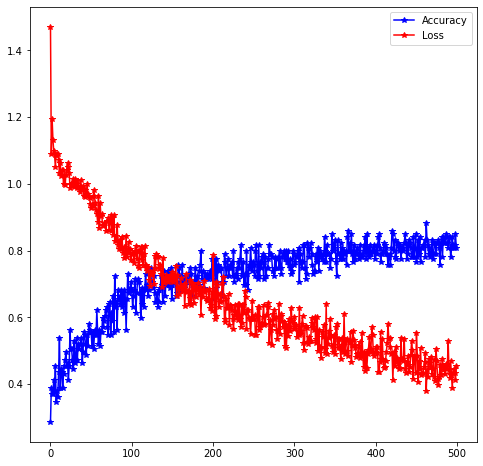

In [20]:
plt.figure(figsize= (8, 8))
plt.plot(data.accuracy, color = "b" , marker ="*" , label = "Accuracy")
plt.plot(data.loss , color = "r" , marker ="*"  , label ="Loss")
plt.legend()

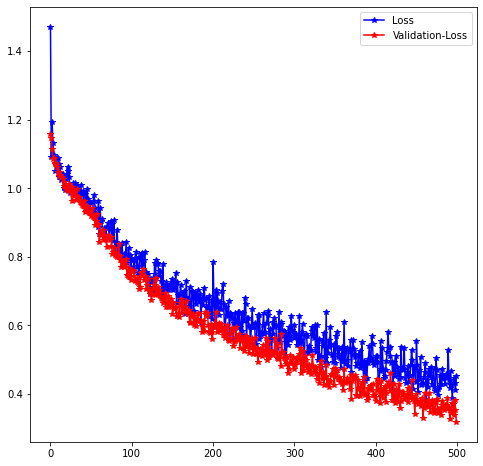

In [21]:
# Plotting the graph for loss and validation loss

plt.figure(figsize= (8, 8))
plt.plot(data.loss, color = "b" , marker ="*" , label = "Loss")
plt.plot(data.val_loss , color = "r" , marker ="*"  , label ="Validation-Loss")
plt.legend()

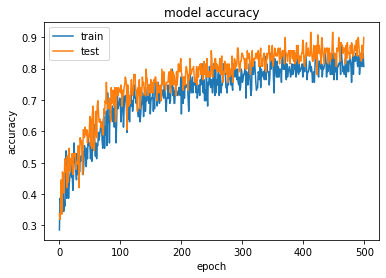

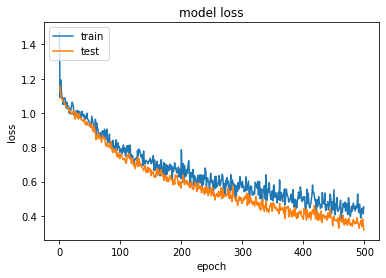

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# Evaluate the model on training data

model.evaluate(training_data)

4/4 [==============================] - 4s 1s/step - loss: 0.3668 - accuracy: 0.8655


[0.3668407201766968, 0.8655462265014648]

In [24]:
# Evaluate the model on test data

model.evaluate(test_data)

4/4 [==============================] - 5s 1s/step - loss: 0.3665 - accuracy: 0.8487


[0.36647045612335205, 0.848739504814148]

In [25]:
# Prediction on test data

y_pred = model.predict(test_data)
y_pred

array([[1.91773951e-01, 7.74225235e-01, 3.40008661e-02],
       [7.09833184e-05, 7.14480047e-05, 9.99857545e-01],
       [1.96756346e-07, 9.99999762e-01, 1.22063614e-13],
       [8.66499066e-01, 1.06503852e-01, 2.69969888e-02],
       [5.99709332e-01, 3.91024530e-01, 9.26613901e-03],
       [1.37002831e-02, 1.40751615e-01, 8.45548093e-01],
       [7.99403548e-01, 3.12184691e-02, 1.69377953e-01],
       [5.33578433e-02, 1.87770247e-01, 7.58871913e-01],
       [4.97506522e-02, 9.18965638e-01, 3.12835984e-02],
       [9.98021187e-06, 1.32178247e-05, 9.99976754e-01],
       [2.35257596e-02, 2.02776909e-01, 7.73697376e-01],
       [1.03177324e-01, 3.38365227e-01, 5.58457494e-01],
       [1.51832378e-03, 3.56907964e-01, 6.41573668e-01],
       [1.15908511e-01, 8.36172283e-01, 4.79192212e-02],
       [8.47753584e-01, 1.51547968e-01, 6.98400894e-04],
       [8.21219027e-01, 1.45418212e-01, 3.33626792e-02],
       [8.53827477e-01, 9.83670205e-02, 4.78055254e-02],
       [9.07105625e-01, 9.07794

In [26]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 0, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 0, 1], dtype=int64)

In [27]:
model.get_weights()

[array([[[[-0.01577579, -0.17095502,  0.11927438, -0.08038942,
           -0.13061966,  0.10282256, -0.02091276,  0.02655997,
           -0.1295348 , -0.05223262,  0.0954574 , -0.14892067,
           -0.09076996,  0.118245  ,  0.15222545, -0.08684898],
          [ 0.05108628,  0.10232567, -0.09756914, -0.04830385,
            0.08128286, -0.05312224,  0.16201651,  0.10780264,
           -0.12348695, -0.04153395, -0.13476901,  0.07753904,
            0.00619383,  0.11283122, -0.07320293, -0.10225701],
          [ 0.16843134,  0.05712675,  0.18566577,  0.00498325,
           -0.15279448, -0.18976486, -0.15382333, -0.18530054,
            0.04670409,  0.11824366, -0.04046817, -0.17036296,
            0.02990277,  0.02587593,  0.12438224, -0.11959732]],
 
         [[ 0.02230098,  0.17157476,  0.0278887 ,  0.13582669,
           -0.16544908, -0.0147915 , -0.06615048, -0.05888003,
           -0.14922602, -0.0007461 , -0.04071463, -0.02079503,
           -0.02946683,  0.06737642, -0.0420154 ,

In [28]:
# Evaluating the Predictions on the Train Model

train_score = model.evaluate(training_data, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

Train loss: 0.33667466044425964
Train accuracy: 0.8655462265014648


In [29]:
# Evaluating the Predictions on the Test Model

test_score = model.evaluate(test_data, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Test loss: 0.34422996640205383
Test accuracy: 0.8739495873451233


In [30]:
#### Reloading the model in order to use it in the app.py

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


model = load_model('C:\\Users\\ahmed\\OneDrive\\internship projects\\RiceLeaf')
model

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [32]:
model.get_weights()

[array([[[[-0.01639781, -0.17079018,  0.11862847, -0.08023871,
           -0.12934953,  0.10059524, -0.0206522 ,  0.02647178,
           -0.12751202, -0.05295215,  0.09464165, -0.1483311 ,
           -0.09083816,  0.11776502,  0.15042016, -0.08027788],
          [ 0.05072836,  0.10186931, -0.09745384, -0.04819312,
            0.08146869, -0.05182673,  0.16178837,  0.10753489,
           -0.13880461, -0.0419878 , -0.1352886 ,  0.07687731,
            0.00672471,  0.11298147, -0.07269742, -0.10237116],
          [ 0.16807337,  0.05710489,  0.18521285,  0.00482612,
           -0.1513826 , -0.1792457 , -0.1535229 , -0.18485972,
            0.03055493,  0.11771655, -0.03960391, -0.17065772,
            0.02916301,  0.02616967,  0.12345078, -0.12689103]],
 
         [[ 0.02168913,  0.17174819,  0.02726292,  0.13589804,
           -0.16423732, -0.01734935, -0.06608565, -0.05903754,
           -0.14479406, -0.00142675, -0.04128862, -0.02013942,
           -0.02957819,  0.06690286, -0.04389503,

# Conclusion

### Original Dataset :-
##### No.of classes : 3
##### No.of images in each class : 40
##### Total images : 119

### Split of Train and Test Images :-
##### Train images in each class : 32 
##### Test images in each class : 8
##### Total images in Train Data : 96
##### Total images in Test Data : 24

### Augmented Images :-
##### Train images in each class : 400
##### Test images in each class : 80
##### Total images in Train Data : 1190
##### Total images in Test Data : 238


### The Rice Leaf Disease Prediction model using customized CNN ('Convolutional neural network') has given the following results with 500 epochs :-

##### The model is saved at the following checkpoint :
##### Accuracy : 0.9775
##### Validation / Testing Accuracy : 0.92917